# Random Forest Regressor Model

## ** Notebook Content **

1. Introduction


2. Data Preprocessing
    - 2.1 Importing the required packages
    - 2.2 Loading the dataset
    - 2.3 Preparing the data


3. Building a "baseline" model applying logistics regression
    - 3.1 Build a prediction model with numerical variables
    - 3.2 Build a prediction model with numerical and categorical variables 
        - 3.2.1 Apllying dummy variables
        - 3.2.2 Convert the remaining categorical variables into numbers
        - 3.2.3 Implement the same changes in the test set
    - 3.3 Saving the changes
         
         
4. Training Random Forest Regressor
    - 4.1 Fitting the Random Forest Regressor
    - 4.2 Predicting the test results
    - 4.3 Applying K-Fold Cross-Validation technique
    - 4.4 Applying Random Hyper-parameters Grid
        - 4
    - 4.5 Applying Grid-Search to find the best parameters

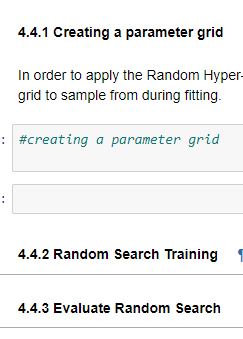

## 1. Introduction

explanation...

## 2 Data Preprocessing

### 2.1 Importing the requiered packages 

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import tensorflow as tf

In [2]:
#check the tensorflow version that we are using
#tf.__version__

In [3]:
#check the python version that we are using
print(sys.version)

3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]


### 2.2 Loading the dataset

In [4]:
#loading the training set
df_train_clean = pd.read_csv('df_train_clean.csv')
df_train_clean.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [5]:
df_train_clean.shape

(1324, 75)

### 2.3 Preparing the data

In [6]:
#remove variables with low correlation
df_train_clean.drop(['MoSold', 'ScreenPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'LowQualFinSF', 'MSSubClass',
               'BsmtFinSF2', 'BsmtHalfBath'], axis = 1, inplace = True)

In [7]:
#check the shape of the dataframe after removing the variables with low correlation
df_train_clean.shape

(1324, 65)

In [8]:
#Getting the Dependent and Independent variables
X_train = df_train_clean.iloc[:, :-1] #all lines, all columns except the last one
y_train = df_train_clean.iloc[:, 64] #all lines, only the last column

In [9]:
#check the shaape of X_train and y_train
X_train.shape, y_train.shape

((1324, 64), (1324,))

## 3. Building a "baseline" model applying logistics regression

### 3.1 Build a prediction model with numerical variables

In [10]:
pilot_model_3 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF']]

In [11]:
pilot_model_3.shape

(1324, 26)

In [12]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_3 = LogisticRegression (random_state = 0)
log_regressor_3.fit(pilot_model_3, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
#Compute Score (𝑅2) for the pilot_model_3 and y_training
print('Training Score: {}'.format(log_regressor_3.score(pilot_model_3, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_3 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_3.predict(pilot_model_3) - y_train)**2)))

Training Score: 0.6102719033232629
Training MSE: 515970129.33912385


### 3.2 Build a prediction model with numerical and categorical variables

Important Note =>> We are going to analyze the following categorical variables:

Street, LotShape, LandContour ,Utilities, LandSlope, BldgType, MasVnrType, ExterQual, ExterCond, LotConfig Neighborhood, Condition1, Condition2, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd.


Regarding the dummy variables conversion, we are only going to treat the following variables keeping in mind the analysis performed in the main House Price Prediction Notebook:

*Street, LotShape, LandContour ,Utilities, LandSlope, BldgType, MasVnrType, ExterQual, ExterCond*


The remaining categoriacal variables will be converted into numbers at the end of the notebook.

#### 3.2.1 Apllying dummy variables


#### Group A

In this section we are going to treat the following variables keeping in mind the analysis performed in the main House Price Prediction Notebook:

*LotShape, LandContour, LandSlope, BldgType, MasVnrType, ExterQual*.

__1 - LandSlope__

The *LandSlope* variable identifies the slope of property (pendiente de la propiedad).

In [14]:
#convert the LandSlope variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['LandSlope'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

(1324, 66)

In [15]:
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SaleType', 'SaleCondition',
       'LandSlope_Gtl', 'LandSlo

In [16]:
#numerical model + LandSlope dummy variables
pilot_model_4 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'LandSlope_Gtl','LandSlope_Mod', 'LandSlope_Sev']]

pilot_model_4.shape

(1324, 29)

In [17]:
pilot_model_4.shape

(1324, 29)

In [18]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_4 = LogisticRegression (random_state = 0)
log_regressor_4.fit(pilot_model_4, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
#Compute Score (𝑅2) for the pilot_model_4 and y_training
print('Training Score: {}'.format(log_regressor_4.score(pilot_model_4, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_4 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_4.predict(pilot_model_4) - y_train)**2)))

Training Score: 0.622356495468278
Training MSE: 476450343.1268882


Comments =>> It looks like the **Score and MSE of our model **improved remarkably** after including the 'LandSlope_Gtl','LandSlope_Mod' and 'LandSlope_Sev'variables compared to the pilot_model_3 ("0.6223 VS 0.6102" and "476450343.126 VS 515970129.339" respectively).

__2 - LotShape__

The *LotShape* variable identifies the general shape of property

In [20]:
#convert the LotShape variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['LotShape'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

(1324, 69)

In [21]:
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LandContour',
       'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleType', 'SaleCondition', 'LandSlope_Gtl',
       'LandSlope_Mod', 'La

In [22]:
#numerical model + LotShape dummy variables
pilot_model_5 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg']]

pilot_model_5.shape

(1324, 30)

In [23]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_5 = LogisticRegression (random_state = 0)
log_regressor_5.fit(pilot_model_5, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
#Compute Score (𝑅2) for the pilot_model_5 and y_training
print('Training Score: {}'.format(log_regressor_5.score(pilot_model_5, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_5 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_5.predict(pilot_model_5) - y_train)**2)))

Training Score: 0.6321752265861027
Training MSE: 464727139.60120845


Comments =>> It looks like the **Score and MSE of our model **improved remarkably** after including the 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg' variables compared to the pilot_model_3 ("0.6321 VS 0.6102" and "464727139.601 VS 515970129.339" respectively).

__3 - LandContour__

The LandContour variable identifies the flatness of the property (planitud del inmueble).

In [25]:
#convert the LandContour  variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['LandContour'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

(1324, 72)

In [26]:
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleType', 'SaleCondition', 'LandSlope_Gtl',
       'LandSlope_Mod', 'LandSlope_Sev', '

In [27]:
#numerical model + LandContour dummy variables
pilot_model_6 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
                         'LandContour_Lvl']]

pilot_model_6.shape

(1324, 30)

In [28]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_6 = LogisticRegression (random_state = 0)
log_regressor_6.fit(pilot_model_6, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#Compute Score (𝑅2) for the pilot_model_6 and y_training
print('Training Score: {}'.format(log_regressor_6.score(pilot_model_6, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_6 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_6.predict(pilot_model_6) - y_train)**2)))

Training Score: 0.6261329305135952
Training MSE: 487159486.7356495


Comments =>> It looks like the **Score and MSE of our model **improved remarkably** after including the 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl' variables compared to the pilot_model_3 ("0.6261 VS 0.6102" and "487159486.735 VS 515970129.339" respectively).

__4 - MasVnrType__

The MasVnrType variable identifies the Masonry veneer type / tipo de chapa de albañilería.

In [30]:
#convert the LandContour  variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['MasVnrType'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

(1324, 75)

In [31]:
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleType',
       'SaleCondition', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',
       'LotShape_IR1',

In [32]:
#numerical model + LandContour dummy variables
pilot_model_7 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
                           'MasVnrType_Stone']]

pilot_model_7.shape 

(1324, 30)

In [33]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_7 = LogisticRegression (random_state = 0)
log_regressor_7.fit(pilot_model_7, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
#Compute Score (𝑅2) for the pilot_model_7 and y_training
print('Training Score: {}'.format(log_regressor_7.score(pilot_model_7, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_7 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_7.predict(pilot_model_7) - y_train)**2)))

Training Score: 0.6306646525679759
Training MSE: 469581231.55740184


Comments =>> It looks like the **Score and MSE of our model **improved remarkably** after including the 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl' variables compared to the pilot_model_3 ("0.6306 VS 0.6102" and "469581231.557 VS 515970129.339" respectively).

__5 - ExterQual__

The ExterQual variable evaluates the quality of the material on the exterior.

In [35]:
#convert the ExtrQual  variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['ExterQual'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

(1324, 78)

In [36]:
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleType',
       'SaleCondition', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',
       'LotShape_IR1', 'LotShape_IR

In [37]:
#numerical model + ExterQual dummy variables
pilot_model_8 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA']]

pilot_model_8.shape

(1324, 30)

In [38]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_8 = LogisticRegression (random_state = 0)
log_regressor_8.fit(pilot_model_8, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
#Compute Score (𝑅2) for the pilot_model_8 and y_training
print('Training Score: {}'.format(log_regressor_8.score(pilot_model_8, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_8 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_8.predict(pilot_model_8) - y_train)**2)))

Training Score: 0.629154078549849
Training MSE: 439340030.62009066


Comments =>> It looks like the **Score and MSE of our model **improved remarkably** after including the 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA' variables compared to the pilot_model_3 ("0.6291 VS 0.6102" and "439340030.620 VS 515970129.339" respectively).

__6 - BldgType__

The BldgType variable identifies the type of dwelling.

In [40]:
#convert the LandContour  variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['BldgType'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

(1324, 82)

In [41]:
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SaleType', 'SaleCondition',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'LotShape_IR1',
       'LotShape_IR2', 'LotShap

In [42]:
#numerical model + ExterCond dummy variables
pilot_model_9 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'BldgType_1Fam', 'BldgType_2fmCon',
                           'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE']]

pilot_model_9.shape

(1324, 31)

In [43]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_9 = LogisticRegression (random_state = 0)
log_regressor_9.fit(pilot_model_9, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#Compute Score (𝑅2) for the pilot_model_9 and y_training
print('Training Score: {}'.format(log_regressor_9.score(pilot_model_9, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_13 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_9.predict(pilot_model_9) - y_train)**2)))

Training Score: 0.6178247734138973
Training MSE: 481267784.5558912


Comments =>> It looks like the **Score and MSE of our model improved** after including the 'BldgType_1Fam', 'BldgType_2fmCon',
'BldgType_Duplex', 'BldgType_Twnhs' and 'BldgType_TwnhsE' variables compared to the pilot_model_3 ("0.6178 VS 0.6102" and "481267784.555 VS 515970129.339" respectively).

Now, we are going to build a model applying the numercial variables and the dummy variables (Group A) which improved the score of the pilot_model_3 (the initial reference model) to test if the performance of the model improved or not. 

In [45]:
#numerical model + dummy variables (Group A), which improved the score of the pilot_model_3
pilot_model_10 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'LandSlope_Gtl',
                           'LandSlope_Mod', 'LandSlope_Sev', 'LotShape_IR1', 'LotShape_IR2',
                           'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
                           'LandContour_Low', 'LandContour_Lvl', 'MasVnrType_BrkCmn',
                           'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Fa', 
                           'ExterQual_Gd', 'ExterQual_TA', 'BldgType_1Fam', 'BldgType_2fmCon',
                           'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE']]

pilot_model_10.shape

(1324, 50)

In [46]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_10 = LogisticRegression (random_state = 0)
log_regressor_10.fit(pilot_model_10, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
#Compute Score (𝑅2) for the pilot_model_10 and y_training
print('Training Score: {}'.format(log_regressor_10.score(pilot_model_10, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_10 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_10.predict(pilot_model_10) - y_train)**2)))

Training Score: 0.6865558912386707
Training MSE: 319883868.4003021


Great result!!

#### Group B

In this section we are going to treat the following variables keeping in mind the analysis performed in the main House Price Prediction Notebook:

*BsmtQual, BsmtCond, BsmtExposure, CentralAir, KitchenQual, GarageFinish, and PavedDrive*


__1 - BsmtQual__

The BsmtQual variable evaluates the height of the basement (altura del sotano).

In [48]:
#convert the BsmtQual  variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['BsmtQual'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleType', 'SaleCondition', 'LandSlope_Gtl',
       'LandSlope_Mod', 'LandSlope_Sev', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'Lot

In [49]:
#numerical model + BsmtQual dummy variables
pilot_model_11 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'BsmtQual_Ex',
                           'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA']]
pilot_model_11.shape

(1324, 30)

In [50]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_11 = LogisticRegression (random_state = 0)
log_regressor_11.fit(pilot_model_11, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
#Compute Score (𝑅2) for the pilot_model_11 and y_training
print('Training Score: {}'.format(log_regressor_11.score(pilot_model_11, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_11 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_11.predict(pilot_model_11) - y_train)**2)))

Training Score: 0.627643504531722
Training MSE: 438421112.0445619


Comments =>> It looks like the **Score and MSE of our model improved** after including the 'BsmtQual_Ex','BsmtQual_Fa', 'BsmtQual_Gd' and 'BsmtQual_TA' variables compared to the pilot_model_3 ("0.6276 VS 0.6102" and "438421112.044 VS 515970129.339" respectively).

__2 - BsmtCond__

The BsmtCond variable evaluates the general condition of the basement.

In [52]:
#convert the BsmtCond  variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['BsmtCond'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleType', 'SaleCondition', 'LandSlope_Gtl',
       'LandSlope_Mod', 'LandSlope_Sev', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 

In [53]:
#numerical model + BsmtCond dummy variables
pilot_model_12 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA']]

pilot_model_12.shape

(1324, 30)

In [54]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_12 = LogisticRegression (random_state = 0)
log_regressor_12.fit(pilot_model_12, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
#Compute Score (𝑅2) for the pilot_model_12 and y_training
print('Training Score: {}'.format(log_regressor_12.score(pilot_model_12, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_12 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_12.predict(pilot_model_12) - y_train)**2)))

Training Score: 0.6283987915407855
Training MSE: 472572443.84592146


Comments =>> It looks like the **Score and MSE of our model improved** after including the 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po' and 'BsmtCond_TA' variables compared to the pilot_model_3 ("0.6283 VS 0.6102" and "472572443.84 VS 515970129.339" respectively).

__3 - BsmtExposure__

The BsmtExposure variable refers to walkout or garden level walls.

In [56]:
#convert the BsmtExposure variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['BsmtExposure'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleType',
       'SaleCondition', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_Bnk

In [57]:
#numerical model + BsmtCond dummy variables
pilot_model_13 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
                           'BsmtExposure_No']]

pilot_model_13.shape

(1324, 30)

In [58]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_13 = LogisticRegression (random_state = 0)
log_regressor_13.fit(pilot_model_13, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
#Compute Score (𝑅2) for the pilot_model_13 and y_training
print('Training Score: {}'.format(log_regressor_13.score(pilot_model_13, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_13 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_13.predict(pilot_model_13) - y_train)**2)))

Training Score: 0.6389728096676737
Training MSE: 467935964.31117827


Comments =>> It looks like the **Score and MSE of our model improved** after including the 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn' and 'BsmtExposure_No' variables compared to the pilot_model_3 ("0.6389 VS 0.6102" and "467935964.311 VS 515970129.339" respectively).

__4 - CentralAir__

The CentralAir variable refers to the central air conditioning.

In [60]:
#convert the BsmtExposure variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['CentralAir'])
#check the shape of df_object after converting the variables into dummy
X_train.shape


(1324, 92)

In [61]:
#check the name of the columns after converting the variables into dummy
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SaleType',
       'SaleCondition', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_Bnk', 'LandContou

In [62]:
#numerical model + CentralAir dummy variables
pilot_model_14 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'CentralAir_N','CentralAir_Y']]

pilot_model_14.shape

(1324, 28)

In [63]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_14 = LogisticRegression (random_state = 0)
log_regressor_14.fit(pilot_model_14, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
#Compute Score (𝑅2) for the pilot_model_14 and y_training
print('Training Score: {}'.format(log_regressor_14.score(pilot_model_14, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_14 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_14.predict(pilot_model_14) - y_train)**2)))

Training Score: 0.6163141993957704
Training MSE: 493214700.23716015


Comments =>> It looks like the **Score and MSE of our model improved** of our model improved after apllying the 'CentralAir_N' and'CentralAir_Y' variables compared to the pilot_model_3 ("0.6163 VS 0.6102" and "493214700.237 VS 515970129.339" respectively).

__5 - KitchenQual__

The KitchenQual variable evaluates the Kitchen quality.

In [65]:
#convert the KitchenQual variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['KitchenQual'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

(1324, 95)

In [66]:
#check the name of the columns after converting the variables into dummy
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'SaleType', 'SaleCondition',
       'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_HLS', 'LandCo

In [67]:
#numerical model + KitchenQual dummy variables
pilot_model_15 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd',
                           'KitchenQual_TA']]

pilot_model_15.shape

(1324, 30)

In [68]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_15 = LogisticRegression (random_state = 0)
log_regressor_15.fit(pilot_model_15, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
#Compute Score (𝑅2) for the pilot_model_15 and y_training
print('Training Score: {}'.format(log_regressor_15.score(pilot_model_15, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_15 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_15.predict(pilot_model_15) - y_train)**2)))

Training Score: 0.6351963746223565
Training MSE: 403595969.7854985


Comments =>> It looks like the **Score and MSE of our model improved** of our model improved after apllying the 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd' and 'KitchenQual_TA' variables compared to the pilot_model_3 ("0.6351 VS 0.6102" and "403595969.785 VS 515970129.339" respectively).

__6 - GarageFinish__

The GarageFinish variable refers to the interior finish of the garage (remate final del garaje).

In [70]:
#convert the GarageFinish variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['GarageFinish'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

(1324, 97)

In [71]:
#check the name of the columns after converting the variables into dummy
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleType', 'SaleCondition', 'LandSlope_Gtl',
       'LandSlope_Mod', 'LandSlope_Sev', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
       'LandContour_Low', 'Lan

In [72]:
#numerical model + GarageFinish dummy variables
pilot_model_16 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf']]

pilot_model_16.shape

(1324, 29)

In [73]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_16 = LogisticRegression (random_state = 0)
log_regressor_16.fit(pilot_model_16, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
#Compute Score (𝑅2) for the pilot_model_16 and y_training
print('Training Score: {}'.format(log_regressor_16.score(pilot_model_16, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_16 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_16.predict(pilot_model_16) - y_train)**2)))

Training Score: 0.6397280966767371
Training MSE: 498530501.83081573


Comments =>> It looks like the **Score and MSE of our model improved** of our model improved after apllying the 'GarageFinish_Fin', 'GarageFinish_RFn' and 'GarageFinish_Unf' variables compared to the pilot_model_3 ("0.6397 VS 0.6102" and "498530501.830 VS 515970129.339" respectively).

__7 - PavedDrive__

The PavedDrive variable refers to the paved driveway (Calzada pavimentada).

In [75]:
#convert the PavedDrive variable into dummy variables
X_train = pd.get_dummies (X_train, columns = ['PavedDrive'])
#check the shape of df_object after converting the variables into dummy
X_train.shape

(1324, 99)

In [76]:
#check the name of the columns after converting the variables into dummy
X_train.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterCond',
       'Foundation', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'SaleType', 'SaleCondition', 'LandSlope_Gtl',
       'LandSlope_Mod', 'LandSlope_Sev', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
       'LandContour_Low', 'LandContour_Lvl',

In [77]:
#numerical model + PavedDrive dummy variables
pilot_model_17 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y']]

pilot_model_17.shape

(1324, 29)

In [78]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_17 = LogisticRegression (random_state = 0)
log_regressor_17.fit(pilot_model_17, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
#Compute Score (𝑅2) for the pilot_model_17 and y_training
print('Training Score: {}'.format(log_regressor_17.score(pilot_model_17, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_17 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_17.predict(pilot_model_17) - y_train)**2)))

Training Score: 0.6216012084592145
Training MSE: 479070896.80966765


Comments =>> It looks like the Score and MSE of our model improved of our model improved after apllying the 'PavedDrive_N', 'PavedDrive_P' and 'PavedDrive_Y' variables compared to the pilot_model_3 ("0.6216 VS 0.6102" and "479070896.809 VS 515970129.339" respectively).

Now, we are going to build a model applying the numercial variables and the dummy variables (Group B) which improved the score of the pilot_model_3 (the initial reference model) to test if the performance of the model improved or not.

In [80]:
#numerical model + dummy variables (Group B), which improved the score of the pilot_model_3
pilot_model_18 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 
                          'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 
                          'BsmtExposure_Mn', 'BsmtExposure_No', 'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 
                          'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageFinish_Fin', 'GarageFinish_RFn', 
                          'GarageFinish_Unf','PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y']]

pilot_model_18.shape

(1324, 50)

In [81]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_18 = LogisticRegression (random_state = 0)
log_regressor_18.fit(pilot_model_18, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
#Compute Score (𝑅2) for the pilot_model_18 and y_training
print('Training Score: {}'.format(log_regressor_18.score(pilot_model_18, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_18 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_18.predict(pilot_model_18) - y_train)**2)))

Training Score: 0.7129909365558912
Training MSE: 324496155.80513597


Great results!!

#### Applying all dummy variables

Now, we proceed to merge all the dummy variables in the same pilot_model.

In [83]:
#numerical model + dummy variables (Group A & Group B) which improved the score of the pilot_model_3
pilot_model_19 = X_train[['OverallQual', 'GrLivArea', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
                           'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea' ,
                           'BsmtFinSF1', 'LotFrontage', 'BsmtFullBath', 'Fireplaces', 'OpenPorchSF', 'WoodDeckSF', 
                           '2ndFlrSF', 'HalfBath','LotArea', 'BedroomAbvGr', 'OverallCond', 'KitchenAbvGr',
                           'EnclosedPorch', 'BsmtUnfSF', 'LandSlope_Gtl','LandSlope_Mod', 'LandSlope_Sev', 'LotShape_IR1', 
                           'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
                           'LandContour_Low', 'LandContour_Lvl', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None', 
                           'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'BldgType_1Fam', 
                           'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'BsmtQual_Ex', 
                           'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po', 
                           'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 
                           'CentralAir_N', 'CentralAir_Y', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 
                           'KitchenQual_TA', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf','PavedDrive_N', 
                           'PavedDrive_P', 'PavedDrive_Y']]

pilot_model_19.shape

(1324, 74)

In [84]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_19 = LogisticRegression (random_state = 0)
log_regressor_19.fit(pilot_model_19, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
#Compute Score (𝑅2) for the pilot_model_20 and y_training
print('Training Score: {}'.format(log_regressor_19.score(pilot_model_19, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_20 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_19.predict(pilot_model_19) - y_train)**2)))

Training Score: 0.7741691842900302
Training MSE: 183925345.60725075


Comments =>> **We have achieved the highest result by applying the combination of those dummy variables that have a positive impact on model performance.**

#### 3.2.2 Convert the remaining categorical variables into numbers

Now, we are going to convert the remaining categorical variables into numbers and check the performance of the model.

In [86]:
#convert the rest of the categorical variables into numbers
from sklearn.preprocessing import LabelEncoder
lencoders = {}

for col in X_train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    X_train[col] = lencoders[col].fit_transform(X_train[col])

In [87]:
#check the datatype of X_train to review that all the variables are numbers
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 99 columns):
MSZoning              1324 non-null int32
LotFrontage           1324 non-null float64
LotArea               1324 non-null int64
Street                1324 non-null int32
Utilities             1324 non-null int32
LotConfig             1324 non-null int32
Neighborhood          1324 non-null int32
Condition1            1324 non-null int32
Condition2            1324 non-null int32
HouseStyle            1324 non-null int32
OverallQual           1324 non-null int64
OverallCond           1324 non-null int64
YearBuilt             1324 non-null int64
YearRemodAdd          1324 non-null int64
RoofStyle             1324 non-null int32
RoofMatl              1324 non-null int32
Exterior1st           1324 non-null int32
Exterior2nd           1324 non-null int32
MasVnrArea            1324 non-null float64
ExterCond             1324 non-null int32
Foundation            1324 non-null int32
BsmtFin

In [88]:
#Review the final data
X_train.head()

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,3,65.0,8450,1,0,4,5,2,2,5,...,0,0,1,0,0,1,0,0,0,1
1,3,80.0,9600,1,0,2,24,1,2,2,...,0,0,0,1,0,1,0,0,0,1
2,3,68.0,11250,1,0,4,5,2,2,5,...,0,0,1,0,0,1,0,0,0,1
3,3,60.0,9550,1,0,0,6,2,2,5,...,0,0,1,0,0,0,1,0,0,1
4,3,84.0,14260,1,0,2,15,2,2,5,...,0,0,1,0,0,1,0,0,0,1


In [89]:
#numerical model + all dummy variables + remaining numerical variables ()
pilot_model_20 = X_train

pilot_model_20.shape

(1324, 99)

In [90]:
#Fitting logistic Regression into the Training set
from sklearn.linear_model import LogisticRegression
log_regressor_20 = LogisticRegression (random_state = 0)
log_regressor_20.fit(pilot_model_20, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
#Compute Score (𝑅2) for the pilot_model_20 and y_training
print('Training Score: {}'.format(log_regressor_20.score(pilot_model_20, y_train)))
#Compute MSE (Mean Squared Error) for the pilot_model_20 and y_training
print('Training MSE: {}'.format(np.mean((log_regressor_20.predict(pilot_model_20) - y_train)**2)))

Training Score: 0.8950151057401813
Training MSE: 89562058.1336858


In [92]:
X_train.shape, y_train.shape

((1324, 99), (1324,))

Explanation....

#### 3.2.3 Implementing the changes in the test test

In order to build a good model and predict the results correctly, we have to implement in the test set the same changes we made earlier in the training set to have the inforamtion in the same format and get realistic results.

##### a) Loading the dataset

Let's start loading the test set.

In [93]:
#loading the X_test dataset
X_test = pd.read_csv('df_test_clean.csv')
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [94]:
#check the shape of the test set
X_test.shape

(1319, 74)

##### b) Delete variables with low correlation

We are going to remove those variables that show a low correlation with respect to the SalePrice variable.

In [95]:
#remove variables with low correlation
X_test.drop(['MoSold', 'ScreenPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'YrSold', 'LowQualFinSF', 'MSSubClass',
               'BsmtFinSF2', 'BsmtHalfBath'], axis = 1, inplace = True)

In [96]:
#check the shape of the test set after removing variables with low correlation
X_test.shape

(1319, 64)

##### c) Convert some categorical variables into dummy


We are going to convert into dummy variables some categorical features that have an impact on the SalePrice.

In [97]:
#convert the LandSlope variable into dummy variables
X_test = pd.get_dummies (X_test, columns = ['LandSlope', 'LotShape', 'LandContour', 'MasVnrType', 'ExterQual', 'BldgType', 
                                             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'CentralAir', 'KitchenQual', 'GarageFinish',
                                             'PavedDrive'])

#check the shape of test set after converting the variables into dummy
X_test.shape

(1319, 99)

##### d) Convert the remaining categorical variables into numbers

Regarding the remaining categorical variables, we have to convert them into numbers in order to buil our regression model.

In [98]:
#convert the rest of the categorical variables into numbers
from sklearn.preprocessing import LabelEncoder
lencoders = {}

for col in X_test.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    X_test[col] = lencoders[col].fit_transform(X_test[col])

In [99]:
#check the datatype of X_train to review that all the variables are numbers
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 99 columns):
MSZoning              1319 non-null int32
LotFrontage           1319 non-null float64
LotArea               1319 non-null int64
Street                1319 non-null int32
Utilities             1319 non-null int32
LotConfig             1319 non-null int32
Neighborhood          1319 non-null int32
Condition1            1319 non-null int32
Condition2            1319 non-null int32
HouseStyle            1319 non-null int32
OverallQual           1319 non-null int64
OverallCond           1319 non-null int64
YearBuilt             1319 non-null int64
YearRemodAdd          1319 non-null int64
RoofStyle             1319 non-null int32
RoofMatl              1319 non-null int32
Exterior1st           1319 non-null int32
Exterior2nd           1319 non-null int32
MasVnrArea            1319 non-null float64
ExterCond             1319 non-null int32
Foundation            1319 non-null int32
BsmtFin

In [100]:
#Review the final data
X_test.head()

,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,HouseStyle,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,2,80.0,11622,1,0,4,12,1,2,2,...,0,0,0,1,0,0,1,0,0,1
1,3,81.0,14267,1,0,0,12,2,2,2,...,0,0,1,0,0,0,1,0,0,1
2,3,74.0,13830,1,0,4,8,2,2,4,...,0,0,0,1,1,0,0,0,0,1
3,3,78.0,9978,1,0,4,8,2,2,4,...,0,0,1,0,1,0,0,0,0,1
4,3,43.0,5005,1,0,4,22,2,2,2,...,0,0,1,0,0,1,0,0,0,1


Now, we are ready to training the Random Forest Regressor model, as the training set and test set are aligned.

### 3.3 Saving the changes

In [101]:
#export the baseline model to csv
X_train.to_csv('Xtrain_baseline_model.csv', index=False)
y_train.to_csv('ytrain_baseline_model.csv', index = False)
X_test.to_csv('Xtest_baseline_model.csv', index = False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
y_train.to_pickle("./y_training.pkl")

## 4. Training Random Forest Regressor

Explanation...

### 4.1 Fitting the Random Forest Regressor

In [103]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rf_regressor_1 = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_regressor_1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [104]:
#Compute Score (𝑅2) for the X_train and y_training
print('Training Score: {}'.format(rf_regressor_1.score(X_train, y_train)))
#Compute MSE (Mean Squared Error) for the X_train  and y_training
print('Training MSE: {}'.format(np.mean((rf_regressor_1.predict(X_train) - y_train)**2)))

Training Score: 0.9739051625728526
Training MSE: 123354012.79515868


In [105]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rf_regressor_2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [106]:
#Compute Score (𝑅2) for the X_train and y_training
print('Training Score: {}'.format(rf_regressor_2.score(X_train, y_train)))
#Compute MSE (Mean Squared Error) for the X_train  and y_training
print('Training MSE: {}'.format(np.mean((rf_regressor_2.predict(X_train) - y_train)**2)))

Training Score: 0.9816607710776672
Training MSE: 86692146.88363299


Explanation....

### 4.2 Predicting the test results

In [107]:
# Predicting the test set results
#rf_regressor_1
y_pred1 = rf_regressor_1.predict(X_test)
y_pred1

array([126600., 154805., 178900., ...,  85250., 148860., 221970.])

In [108]:
# Predicting the test set results
#rf_regressor_2
y_pred2 = rf_regressor_2.predict(X_test)
y_pred2

array([120180.98, 154671.9 , 182503.4 , ...,  87166.  , 150684.29,
       223880.76])

¿como continuamos?????

### 4.3 Applying K-Fold Cross-Validation technique

In [109]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = rf_regressor_1, X = X_train, y = y_train, cv = 10)
print("Score / Accuracy: {:.2f} %".format(scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(scores.std()*100))

Score / Accuracy: 85.48 %
Standard Deviation: 3.63 %


Comments: ......

### 4.4 Applying Random Hyper-parameters Grid technique

We would like to optimize our random forest model tunign some hyper-parameters to get a better performance. In order to do it, we will use the **"Random Hyper-parameters Grid" and "Grid-Search" method to find the best parameters for our regression model.**

Before starting tunning the hyper-parameters, we need to check what are the parameters that we are using now.

In [110]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_regressor_1.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


We will try adjusting the following set of hyperparameters:
* __n_estimators__ = number of trees in the foreset
* __max_features__ = max number of features considered for splitting a node
* __max_depth__ = max number of levels in each decision tree
* __min_samples_split__ = min number of data points placed in a node before the node is split
* __min_samples_leaf__ = min number of data points allowed in a leaf node
* __bootstrap__ = method for sampling data points (with or without replacement)

We are going to start our analysis applying the **Random Hyper-parameters Grid technique**, whose benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

#### 4.4.1 Creating a parameter grid 

In order to apply the Random Hyper-parameters Grid technique, we have to use the **RandomizedSearchCV class**. So, we first need to create a parameter grid to sample from during fitting.

In [ ]:
#creating a parameter grid


#### 4.4.2 Random Search Training

#### 4.4.3 Evaluate Random Search

### 4.5 Applying Grid-Search to find the best parameters